<a href="https://colab.research.google.com/github/kalswjd/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0717_Kaggle_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://paullabworkspace.notion.site/1-4-Python-EDA-2de21dab109644f0b36f376cf070e315#7a5f115630e84af589e7f3fbdfe9760f

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 작업파일과 다운받은 파일이 다른위치에 있을경우 'train.csv'를 수정해주셔야합니다!
train = pd.read_csv('train (3).csv', index_col='PassengerId')
test = pd.read_csv('test (1).csv', index_col='PassengerId')

train.head() #train.tail()을 하게 되면, 마지막 데이터를 확인합니다.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.shape, test.shape

((891, 11), (418, 10))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
sex_mean = train.groupby('Sex')['Age'].mean()

train.loc[(train["Sex"] == 'female') & (train["Age"].isnull()), "Age"] = int(sex_mean[0])
train.loc[(train["Sex"] == 'male') & (train["Age"].isnull()), "Age"] = int(sex_mean[1])

train['Age'] = train['Age'].apply(lambda x:round(x))

train.head(40)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [6]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
# 맨 앞의 알파벳 추출하기
train['Cabin'] = train['Cabin'].fillna('N') #결측치를 'N'으로 채우라는 명령
train['Cabin'] = train['Cabin'].apply(lambda x:x[0]) #해당 값을 0번째 값으로만 채우라는 명령

train.head(20) #제대로 반영이 되었는지 20개만 출력을 해봅니다.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,N,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,N,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,N,S


In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train['Embarked'].isnull().sum()

2

In [10]:
train['Embarked'] = train['Embarked'].fillna('S')

In [11]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train["Survived_label"] = train["Survived"].replace(0, "Dead").replace(1, "Survived")

train[['Survived','Survived_label']].head()

,Survived,Survived_label
PassengerId,,
1,0,Dead
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Dead


In [13]:
train['Survived_label'].value_counts()

Dead        549
Survived    342
Name: Survived_label, dtype: int64

In [14]:
temp = train['Survived_label'].value_counts()
survival_rate = temp[1]/(temp[0] + temp[1])*100

print(f"생존율은 {survival_rate:.1f}% 입니다.")

생존율은 38.4% 입니다.


<Axes: ylabel='Frequency'>

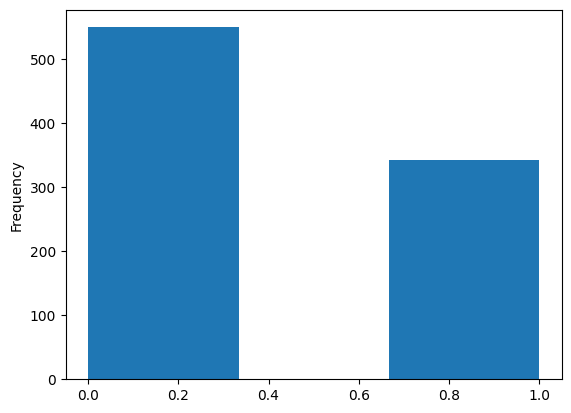

In [15]:
train['Survived'].plot(kind='hist', bins=3)

ValueError: ignored

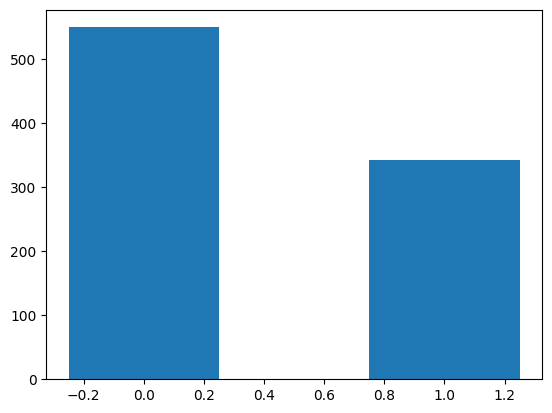

In [16]:
train['Survived'].value_counts().plot(kind='bar', rot='45')

ValueError: ignored

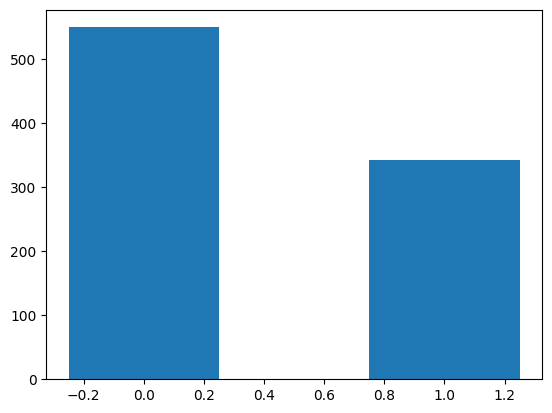

In [17]:
train['Survived_label'].value_counts().plot(kind='bar', rot='45')

<Axes: ylabel='Survived'>

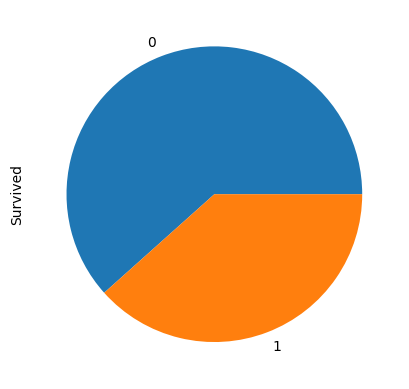

In [18]:
train['Survived'].value_counts().plot(kind='pie')

<Axes: ylabel='Survived_label'>

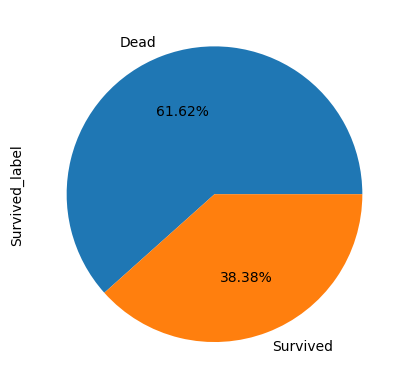

In [19]:
train['Survived_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

TypeError: ignored

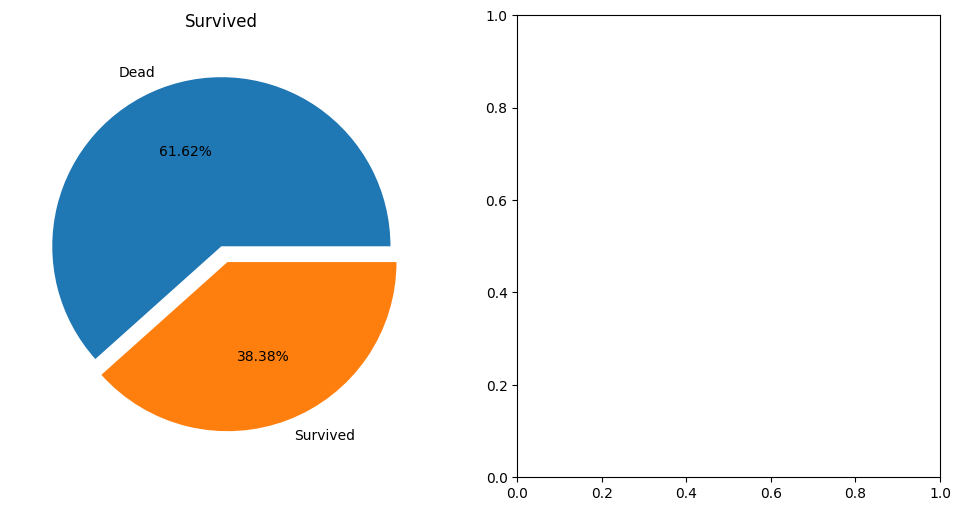

In [21]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [22]:
train['Pclass_label'] = train["Pclass"].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')

train[['Pclass','Pclass_label']].head()

,Pclass,Pclass_label
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


<Axes: ylabel='Pclass_label'>

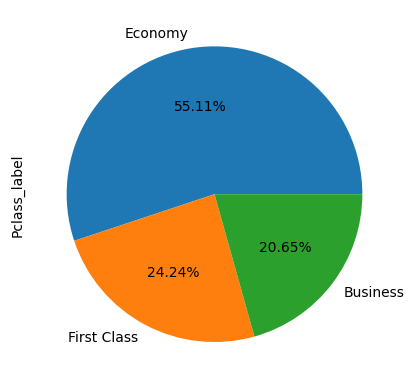

In [23]:
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

ValueError: ignored

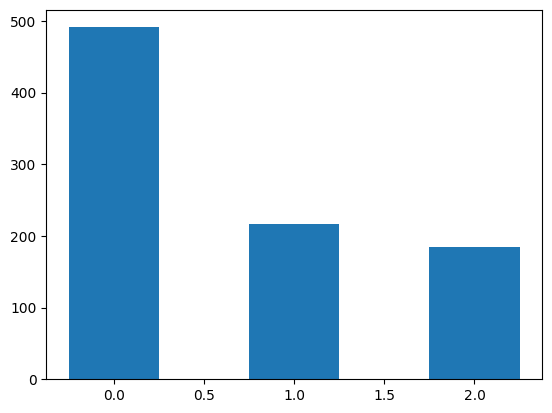

In [24]:
train['Pclass_label'].value_counts().plot(kind='bar', rot='45')

<Axes: xlabel='Pclass_label', ylabel='count'>

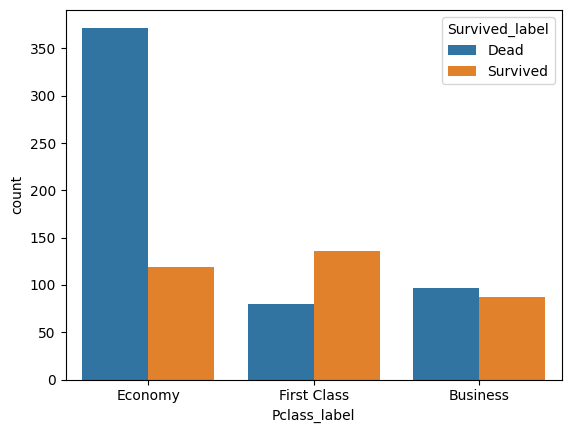

In [25]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

In [26]:
train['Embarked_label'] = train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

train[['Embarked','Embarked_label']].head()

,Embarked,Embarked_label
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


<Axes: xlabel='Embarked_label', ylabel='count'>

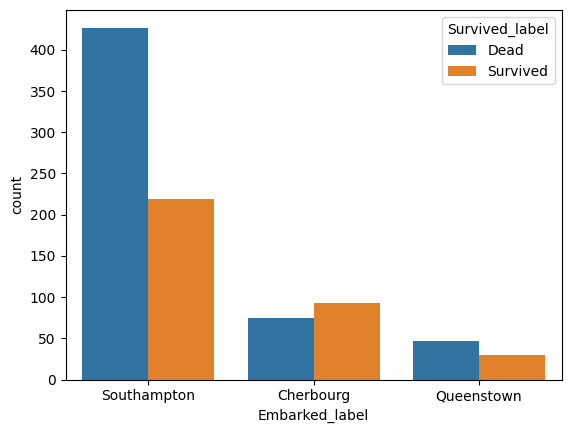

In [27]:
sns.countplot(data=train, x="Embarked_label", hue="Survived_label")

In [28]:

train[['Name']].head(15)


,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"
6,"Moran, Mr. James"
7,"McCarthy, Mr. Timothy J"
8,"Palsson, Master. Gosta Leonard"
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


<Axes: xlabel='Sex', ylabel='count'>

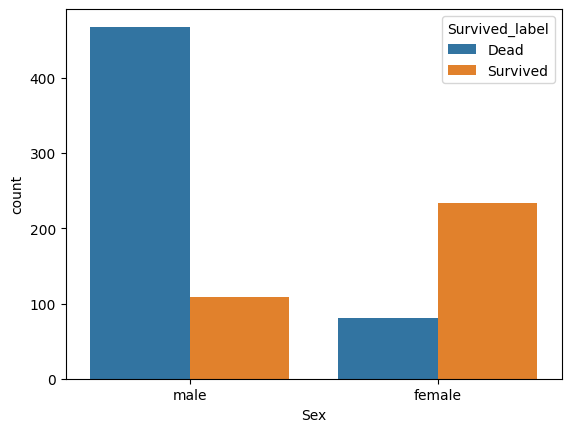

In [29]:
sns.countplot(data=train, x="Sex", hue="Survived_label")

<Axes: xlabel='Pclass_label', ylabel='count'>

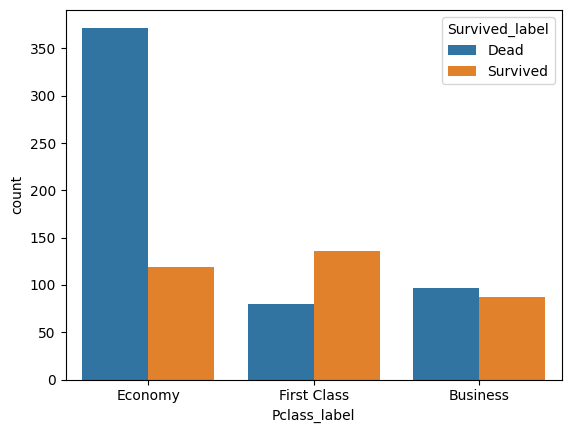

In [30]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

<Axes: xlabel='Cabin', ylabel='count'>

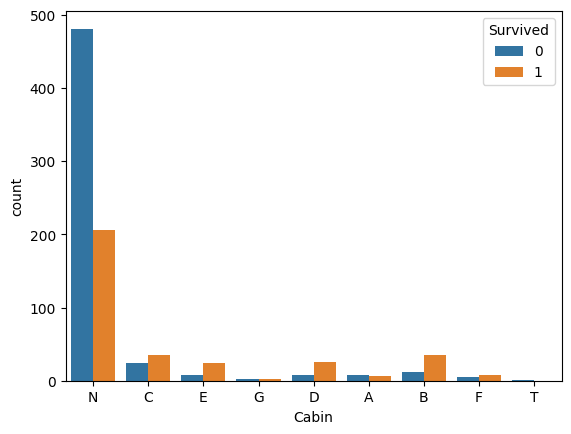

In [31]:
sns.countplot(x='Cabin', hue='Survived', data=train)

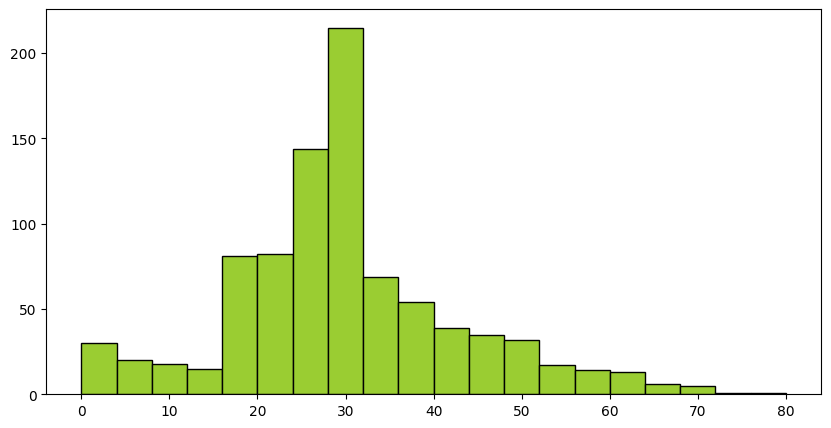

In [32]:
train['Age'].hist(bins=20,figsize=(10,5),grid=False,edgecolor='black',color='yellowgreen');

<Axes: xlabel='Age', ylabel='count'>

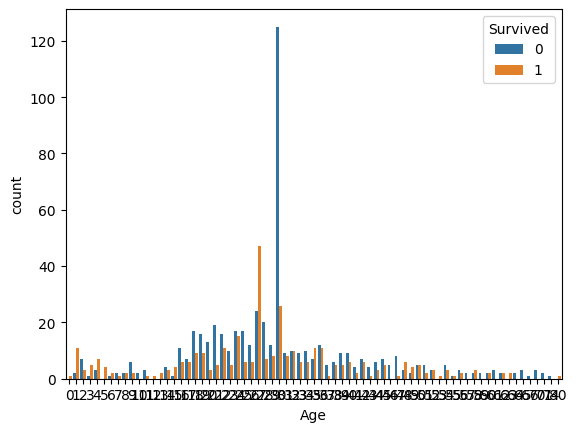

In [33]:
sns.countplot(x='Age', hue='Survived', data=train)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


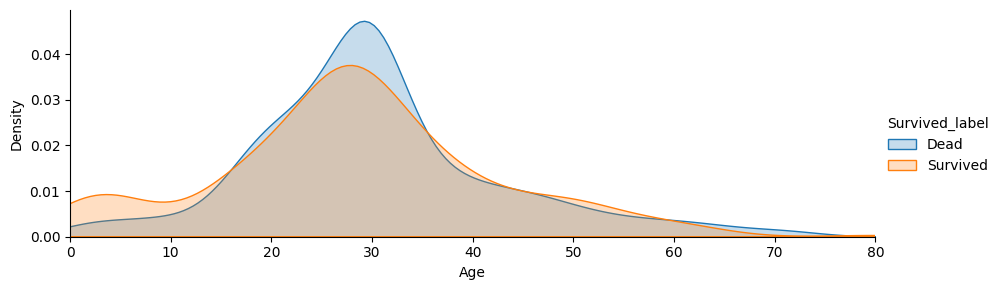

In [34]:
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot,'Age',shade=True)
f.set(xlim=(0,train['Age'].max()))
f.add_legend()

<Axes: xlabel='SibSp', ylabel='count'>

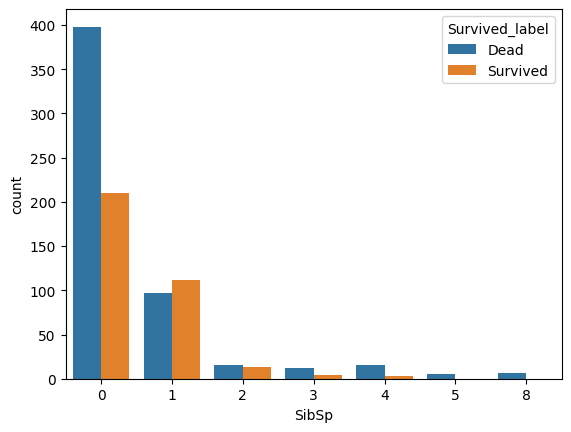

In [35]:
sns.countplot(data=train, x="SibSp", hue="Survived_label")

<Axes: xlabel='Parch', ylabel='count'>

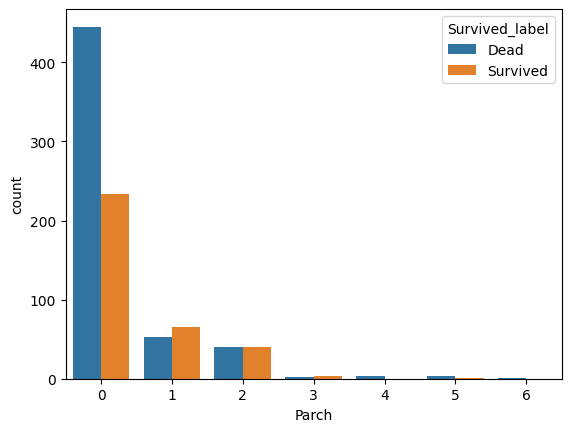

In [36]:
sns.countplot(data=train, x="Parch", hue="Survived_label")

In [37]:
train.loc[(train["SibSp"] == 0 ) & (train["Parch"] == 0),"Single"] = 'Single'
train.loc[(train["SibSp"] != 0 ) | (train["Parch"] != 0),"Single"] = 'Family'

train[["SibSp","Parch","Single"]].head(5)

,SibSp,Parch,Single
PassengerId,,,
1,1,0,Family
2,1,0,Family
3,0,0,Single
4,1,0,Family
5,0,0,Single


In [38]:
pd.pivot_table(data=train, index="Single", values="Survived")

,Survived
Single,
Family,0.505650
Single,0.303538


<Axes: xlabel='Single', ylabel='count'>

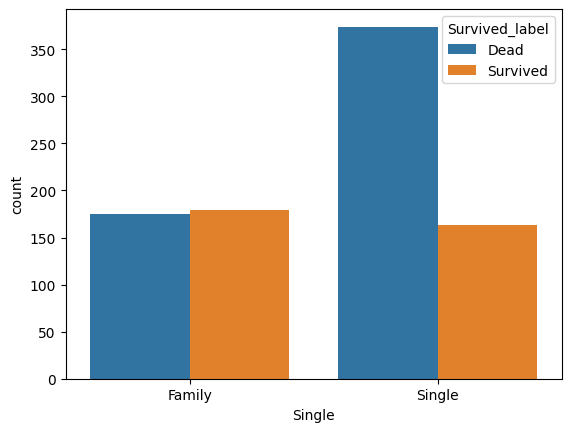

In [39]:
sns.countplot(data=train, x="Single", hue="Survived_label")

In [40]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train[["SibSp", "Parch", "FamilySize"]].head(10)

,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1
6,0,0,1
7,0,0,1
8,3,1,5
9,0,2,3


In [42]:
pd.pivot_table(train, index="FamilySize", values="Survived")


,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


<Axes: xlabel='FamilySize', ylabel='count'>

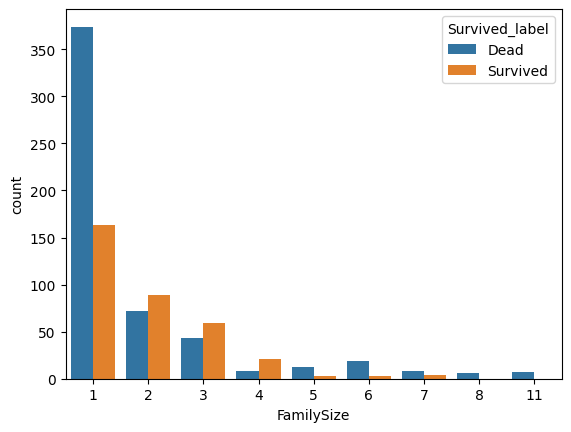

In [43]:
sns.countplot(data=train, x="FamilySize", hue="Survived_label")

In [44]:
train.loc[train["FamilySize"] == 1, "FamilySize_label"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilySize_label"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilySize_label"] = "Big"

train[["FamilySize", "FamilySize_label"]].head(10)

,FamilySize,FamilySize_label
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


<Axes: xlabel='FamilySize_label', ylabel='count'>

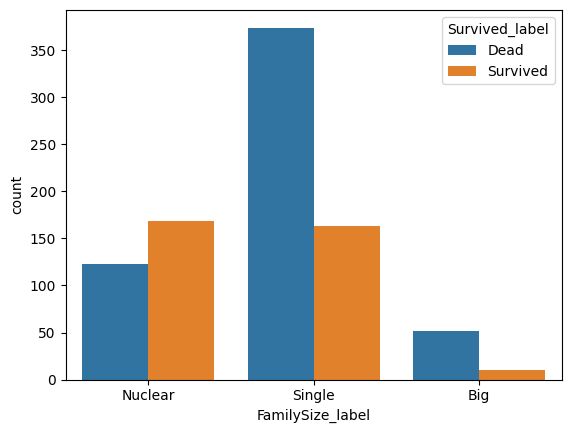

In [45]:
sns.countplot(data=train, x="FamilySize_label", hue="Survived_label")